In [1]:
from sklearn import datasets
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
% pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
iris = datasets.load_iris()
print (iris.data[:5])
print (iris.target[:5])

[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]]
[0 0 0 0 0]


Attribute Information:

sepal length in cm
sepal width in cm
petal length in cm
petal width in cm
class: -- Iris Setosa -- Iris Versicolour -- Iris Virginica

In [3]:
X = iris.data[:, 2:] #petal length and width
y = iris.target

In [5]:
print (X[:5])
print (y[:5])

[[1.4 0.2]
 [1.4 0.2]
 [1.3 0.2]
 [1.5 0.2]
 [1.4 0.2]]
[0 0 0 0 0]


In [6]:
X_train, X_test, y_train, y_test = train_test_split( X, y, 
                        test_size = 0.3, random_state = 1, stratify = y)

print ('labels count in y:', np.bincount(y))
print ('labels count in y_train:', np.bincount(y_train))
print ('labels count in y_test:', np.bincount(y_test))

labels count in y: [50 50 50]
labels count in y_train: [35 35 35]
labels count in y_test: [15 15 15]


In [21]:
?train_test_split

In [6]:
#Any algo with is plot in 2D is standardised, so that the range of data is similar for both the classes
#Standardize the features
# sc = StandardScaler()
# sc.fit(X_train)
# X_train_std = sc.transform(X_train)
# X_test_std = sc.transform(X_test)

In [7]:
def plot_decision_regions(X, y, classifier, test_idx=None, resolution=0.02):

    # setup marker generator and color map
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.3, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], 
                    y=X[y == cl, 1],
                    alpha=0.8, 
                    c=colors[idx],
                    marker=markers[idx], 
                    label=cl, 
                    edgecolor='black')

    # highlight test samples
    if test_idx:
        # plot all samples
        X_test, y_test = X[test_idx, :], y[test_idx]

        plt.scatter(X_test[:, 0],
                    X_test[:, 1],
                    c='',
                    edgecolor='black',
                    alpha=1.0,
                    linewidth=1,
                    marker='o',
                    s=100, 
                    label='test set')

# X_combined_std = np.vstack((X_train_std, X_test_std))
X_combined_std = np.vstack((X_train, X_test))
y_combined = np.hstack((y_train, y_test))

In [8]:
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt

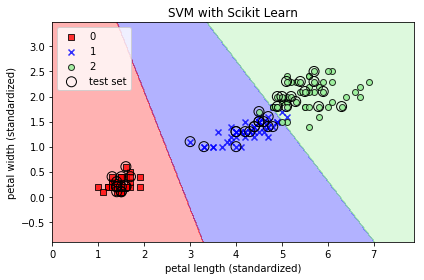

In [10]:
svm = SVC(kernel = 'linear', C = 1.0, random_state = 1)

svm.fit(X_train, y_train)
# svm.fit(X_train_std, y_train)

plot_decision_regions(X_combined_std,
                     y_combined,
                     classifier = svm,
                     test_idx = range(105,150))

plt.title('SVM with Scikit Learn')
plt.xlabel('petal length (standardized)')
plt.ylabel('petal width (standardized)')
plt.legend(loc = 'upper left')
plt.tight_layout()
plt.show()

In [10]:
# from sklearn.metrics import confusion_matrix, accuracy_score

# confusionMatrix = confusion_matrix(y_test, svm.predict(X_test_std))

# print (confusionMatrix)
# print (accuracy_score(y_test, svm.predict(X_test_std)))

[[15  0  0]
 [ 0 15  0]
 [ 0  1 14]]
0.9777777777777777


In [11]:
svm.fit(X_train, y_train)
from sklearn.metrics import confusion_matrix, accuracy_score

confusionMatrix = confusion_matrix(y_test, svm.predict(X_test))

print (confusionMatrix)
print (accuracy_score(y_test, svm.predict(X_test)))

[[15  0  0]
 [ 0 15  0]
 [ 0  1 14]]
0.9777777777777777


# Kernel Trick

In [12]:
np.random.seed(1)
X_xor = np.random.randn(200,2) #100 points each in 2 columns
y_xor = np.logical_xor(X_xor[:, 0] > 0,
                       X_xor[:, 1] > 0)
X_xor[:10]

array([[ 1.62434536, -0.61175641],
       [-0.52817175, -1.07296862],
       [ 0.86540763, -2.3015387 ],
       [ 1.74481176, -0.7612069 ],
       [ 0.3190391 , -0.24937038],
       [ 1.46210794, -2.06014071],
       [-0.3224172 , -0.38405435],
       [ 1.13376944, -1.09989127],
       [-0.17242821, -0.87785842],
       [ 0.04221375,  0.58281521]])

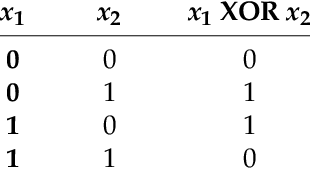

In [13]:
y_xor[:10]

array([ True, False,  True,  True,  True,  True, False,  True, False,
       False])

In [14]:
y_xor = np.where(y_xor, 1, -1)
y_xor[:10]

array([ 1, -1,  1,  1,  1,  1, -1,  1, -1, -1])

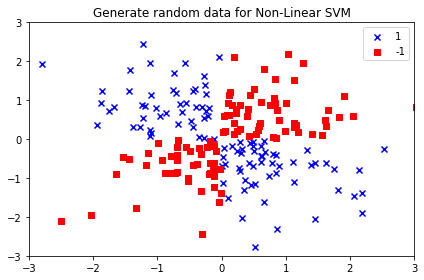

In [15]:
plt.scatter(X_xor[y_xor == 1, 0],
           X_xor[y_xor == 1, 1],
           c = 'b', marker = 'x',
           label = '1')

plt.scatter(X_xor[y_xor == -1, 0],
           X_xor[y_xor == -1, 1],
           c = 'r', marker = 's',
           label = '-1')
plt.title('Generate random data for Non-Linear SVM')

plt.xlim([-3, 3])
plt.ylim([-3,3])
plt.legend(loc = 'best')
plt.tight_layout()
plt.show()

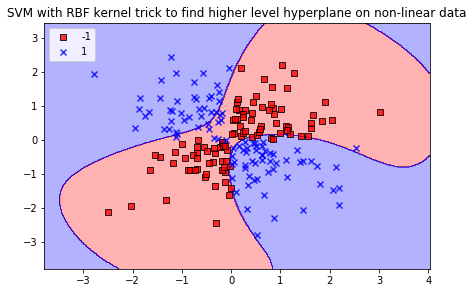

In [16]:
svm = SVC(kernel = 'rbf', random_state = 1, gamma = 0.1, C = 10.0)
# C is the cost of misclassification, default = 1.0
# Lesser value of c will lead to misclassification and higher value 
# will cause misfitting. 
# gamma is how many support vectors should I look at before creating a boundary. Acts as a regularizer
# Find the accuracy with the combination of values of gamma and c and choose the values with highest accuracy.

svm.fit(X_xor, y_xor)

plot_decision_regions(X_xor, y_xor, classifier = svm)

plt.legend(loc = 'upper left')
plt.tight_layout()
plt.title('SVM with RBF kernel trick to find higher level hyperplane on non-linear data')
plt.show()

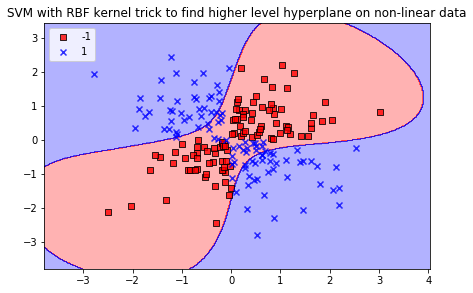

In [17]:
svm = SVC(kernel = 'rbf', random_state = 1, gamma = 0.01, C = 10.0)

svm.fit(X_xor, y_xor)

plot_decision_regions(X_xor, y_xor, classifier = svm)

plt.legend(loc = 'upper left')
plt.tight_layout()
plt.title('SVM with RBF kernel trick to find higher level hyperplane on non-linear data')
plt.show()

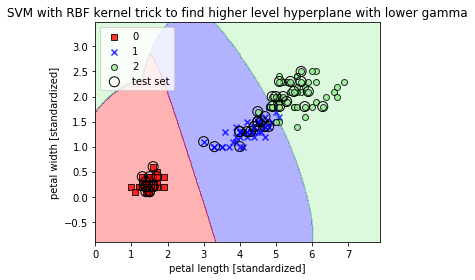

In [19]:
svm = SVC(kernel='rbf', random_state=1, gamma=0.2, C=1.0)
svm.fit(X_train, y_train)
# svm.fit(X_train_std, y_train)

plot_decision_regions(X_combined_std, y_combined,
                      classifier=svm, test_idx=range(105, 150))
plt.title('SVM with RBF kernel trick to find higher level hyperplane with lower gamma')
plt.xlabel('petal length [standardized]')
plt.ylabel('petal width [standardized]')
plt.legend(loc='upper left')
plt.tight_layout()
#plt.savefig('images/03_15.png', dpi=300)
plt.show()
# Not much value added by rbf, coz data is linearly seperable

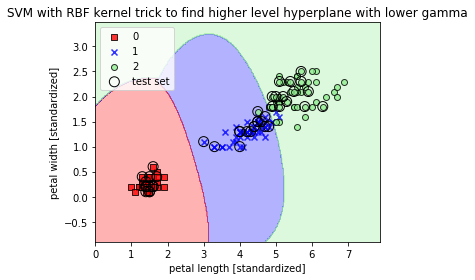

In [20]:
svm = SVC(kernel='rbf', random_state=1, gamma=10, C=100.0)
# svm.fit(X_train_std, y_train)
svm.fit(X_train, y_train)

plot_decision_regions(X_combined_std, y_combined,
                      classifier=svm, test_idx=range(105, 150))
plt.title('SVM with RBF kernel trick to find higher level hyperplane with lower gamma')
plt.xlabel('petal length [standardized]')
plt.ylabel('petal width [standardized]')
plt.legend(loc='upper left')
plt.tight_layout()
#plt.savefig('images/03_15.png', dpi=300)
plt.show()
# Any change in gamma and c will lead to overfitting